

{% include toc title="In This Lesson" icon="file-text" %}





Bonus / graduate activity. In this lesson, you will PLOT precipitation data in R.

However, these data were collected over several decades and sometimes there are

multiple data points per day. The data are also not cleaned. You will find

heading names that may not be meaningful, and other issues with the data.



This lesson provides the basic skills that you need to create a plot of daily

precipitation, for 30 years surrounding the 2013 flood. You will use the skills

that you learned in the previous lessons, coupled with the skills in this lesson

to process the data.



<div class='notice--success' markdown="1">



## <i class="fa fa-graduation-cap" aria-hidden="true"></i> Learning Objectives



After completing this tutorial, you will be able to:



* Aggregate data by a day in R

* View names and rename columns in a dataframe.



### Things You'll Need To Complete This Lesson



Please be sure you have the most current version of R and, preferably,

`RStudio` to write your code.



 **R Skill Level:** Intermediate - To succeed in this tutorial, you will need to

have basic knowledge for use of the `R` software program.



### R Libraries to Install:



* **ggplot2:** `install.packages("ggplot2")`

* **plotly:** `install.packages("dplyr")`



#### Data Download



If you haven't already downloaded this data (from the previous lesson), do so now.



[<i class="fa fa-download" aria-hidden="true"></i> Download Week 2 Data](https://ndownloader.figshare.com/files/7426738){:data-proofer-ignore='' .btn }



</div>





## Work with Precipitation Data



## R Libraries



To get started, load the `ggplot2` and `dplyr` libraries, setup your working

directory and set `stringsAsFactors` to FALSE using `options()`.




In [1]:
# ```{r echo=FALSE}

# knitr::opts_chunk$set(echo = TRUE, message = FALSE, warning=FALSE)



# ```


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import earthlab as et
%matplotlib inline

In [2]:
# ```{r load-libraries, echo=F }



# # setwd("working-dir-path-here")



# # load packages

# library(ggplot2)

# library(dplyr)



# options(stringsAsFactors = FALSE)



# ```






## Import Precipitation Data



We will use the `805333-precip-daily-1948-2013.csv` dataset for this assignment.

in this analysis. This dataset contains the precipitation values collected daily

from the COOP station 050843 in Boulder, CO for 1 January 2003 through 31 December 2013.



Import the data into R and then view the data structure.




In [6]:
path = et.data.get_data('week_02-hw')
precip_file = path + '/precipitation/805333-precip-daily-1948-2013.csv'
precip_boulder = pd.read_csv(precip_file)
precip_boulder.head()

Replace is False and data exists, so doing nothing. Use replace==True to re-download the data.


,STATION,STATION_NAME,ELEVATION,LATITUDE,LONGITUDE,DATE,HPCP,Measurement Flag,Quality Flag
0,COOP:050843,BOULDER 2 CO US,unknown,unknown,unknown,19480801 01:00,0.00,g,
1,COOP:050843,BOULDER 2 CO US,unknown,unknown,unknown,19480802 15:00,0.05,,
2,COOP:050843,BOULDER 2 CO US,unknown,unknown,unknown,19480803 09:00,0.01,,
3,COOP:050843,BOULDER 2 CO US,unknown,unknown,unknown,19480803 14:00,0.03,,
4,COOP:050843,BOULDER 2 CO US,unknown,unknown,unknown,19480803 15:00,0.03,,


In [1]:
# ```{r import-precip, echo=F}



# #precip_file <- "data/flood-co-2013/precip/805325-precip_daily_2003-2013.csv"

# precip_file <- "data/week2/precipitation/805333-precip-daily-1948-2013.csv"



# # import precip data into R data.frame

# precip.boulder <- read.csv(precip_file,

#                            header = TRUE)



# # view first 6 lines of the data

# head(precip.boulder)



# # view structure of data

# str(precip.boulder)



# ```




## About the Data



The structure of the data are similar to what you saw in previous lessons. HPCP

is the total precipitation given in inches, recorded

for the hour ending at the time specified by DATE. There is a designated missing

data value of 999.99. Note that hours with no precipitation are not recorded.





The metadata for this file is located in your week2 directory:

`PRECIP_HLY_documentation.pdf` file that can be downloaded along with the data.

(Note, as of Sept. 2016, there is a mismatch in the data downloaded and the

documentation. The differences are in the units and missing data value:

inches/999.99 (standard) or millimeters/25399.75 (metric)).



### NoData Values



Next, check out the data. Are there no data values? If so, make sure to adjust your

data import code above to account for no data values. Then determine how many no

data values you have in your dataset.




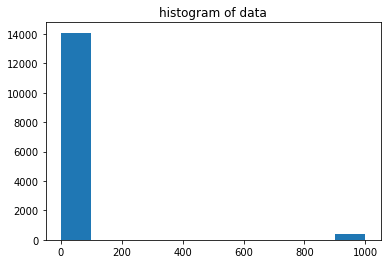

In [8]:
fig, ax = plt.subplots()
ax.hist(precip_boulder['HPCP'])
ax.set(title="histogram of data");

In [ ]:
# ``` {r no-data-values-hist, echo=F, fig.cap="histogram of data"}

# # plot histogram

# hist(precip.boulder$HPCP, main ="Are there NA values?")

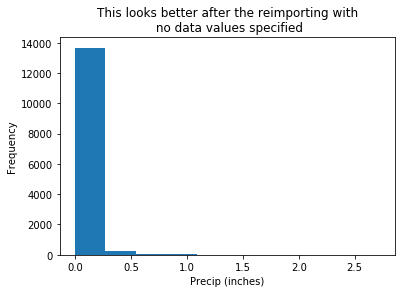

In [14]:
precip_boulder = pd.read_csv(precip_file, na_values=[999.99])
fig, ax = plt.subplots()
ax.hist(precip_boulder['HPCP'].dropna())
ax.set(title="This looks better after the reimporting with\n no data values specified",
       xlabel="Precip (inches)", ylabel="Frequency");

In [1]:
# precip.boulder <- read.csv(precip_file,

#                            header = TRUE, na.strings = 999.99)



# hist(precip.boulder$HPCP, main ="This looks better after the reimporting with\n no data values specified", xlab="Precip (inches)", ylab="Frequency")





# ```

In [15]:
print("How many NA values are there?")
print(precip_boulder.isnull().sum())

How many NA values are there?
STATION               0
STATION_NAME          0
ELEVATION             0
LATITUDE              0
LONGITUDE             0
DATE                  0
HPCP                401
Measurement Flag      0
Quality Flag          0
dtype: int64


In [1]:
# ```{r how-many-na}

# print("how many NA values are there?")

# sum(is.na(precip.boulder))

# ```




### Convert Date and Time



Compared to the previous lessons, notice that we now have date & time in our date field.

To deal with both date and time, we use the `as.POSIXct()` method rather than

as.date which we used previously. The syntax to convert to POSIXct is similar to

what we used previously, but now, we will add the hour (H) and minute (M) to the

format argument as follows:



`as.POSIXct(column-you-want-to-convert-here, format="%Y%m%d %H:%M")`




In [17]:
precip_boulder['DATE'] = pd.to_datetime(precip_boulder['DATE'])
precip_boulder['DATE'].head()

0   1948-08-01 01:00:00
1   1948-08-02 15:00:00
2   1948-08-03 09:00:00
3   1948-08-03 14:00:00
4   1948-08-03 15:00:00
Name: DATE, dtype: datetime64[ns]

In [1]:
# ```{r convert-date, echo=F, results='hide'}



# # convert to date/time and retain as a new field

# precip.boulder$DATE <- as.POSIXct(precip.boulder$DATE,

#                                   format="%Y%m%d %H:%M")

#                                   # date in the format: YearMonthDay Hour:Minute



# # double check structure

# str(precip.boulder$DATE)



# ```




* For more information on date/time classes, see the NEON tutorial

<a href="http://neondataskills.org/R/time-series-convert-date-time-class-POSIX/" target="_blank"> *Dealing With Dates & Times in R - as.Date, POSIXct, POSIXlt*</a>.





## Plot Precipitation Data



Next, let's have a look at the data. Plot using `ggplot()`. Format the plot using

the colors, labels, etc that are most clear and look the best. Your plot does not

need to look like the one below!




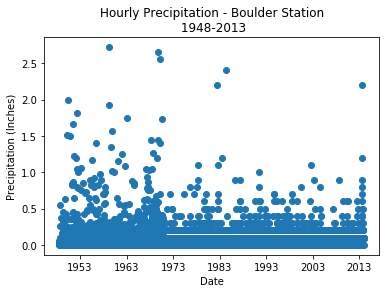

In [19]:
fig, ax = plt.subplots()
ax.plot('DATE', 'HPCP', 'o', data=precip_boulder)
ax.set(xlabel='Date', ylabel='Precipitation (Inches)',
       title="Hourly Precipitation - Boulder Station\n 1948-2013");

In [1]:
# ``` {r plot-precip-hourly, echo=F, fig.cap="hourly precipitation"}



# # plot the data using ggplot2

# precPlot_hourly <- ggplot(precip.boulder, aes(DATE, HPCP)) +   # the variables of interest

#       geom_point(stat="identity") +   # create a bar graph

#       xlab("Date") + ylab("Precipitation (Inches)") +  # label the x & y axes

#       ggtitle("Hourly Precipitation - Boulder Station\n 1948-2013")  # add a title



# precPlot_hourly



# ```




## Differences in the data

Any ideas what might be causing the notable difference in the plotted data through time?




In [25]:
precip_boulder['HPCP_round'] = precip_boulder['HPCP'].apply(np.round, decimals=1)

In [26]:
# ``` {r plot-precip-hourly-round, echo=F, fig.cap="hourly precipitation"}

# # round precip

# precip.boulder$HPCP_round <- round(precip.boulder$HPCP, digits = 1)

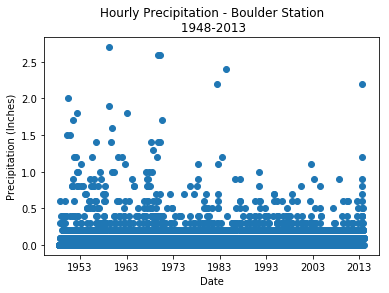

In [27]:
fig, ax = plt.subplots()
ax.plot('DATE', 'HPCP_round', 'o', data=precip_boulder)
ax.set(xlabel='Date', ylabel='Precipitation (Inches)',
       title="Hourly Precipitation - Boulder Station\n 1948-2013");

In [1]:
# # plot the data using ggplot2

# precPlot_hourly_round <- ggplot(precip.boulder, aes(DATE, HPCP_round)) +   # the variables of interest

#       geom_point(stat="identity") +   # create a bar graph

#       xlab("Date") + ylab("Precipitation (Inches)") +  # label the x & y axes

#       ggtitle("Hourly Precipitation - Boulder Station\n 1948-2013")  # add a title



# precPlot_hourly_round



# ```



It is difficult to interpret this plot which spans so many years at such a fine

temporal scale. For our research project, we only need to explore 30 years of data.

Let's do the following:



1. Aggregate the precipitation totals (sum) by day.

2. Subset the data for 30 years (we learned how to do this in a previous lesson).



#### Aggregating and summarizing data



To aggregate data by a particular variable or time period, we can create a new column

in our dataset called day. We will take all of the values for each day and add them

using the `sum()` function. We can do all of this efficiently using dplyr mutate() function.



We use the `mutate()` function to add a new column called **day** to a new data.frame called **daily_sum_precip**. Note that we used `as.Date()` to just grab the dates rather than dates and times which are stored in the POSIX format.






In [44]:
precip_boulder_day = precip_boulder.resample('D', on='DATE').sum()
precip_boulder_day = precip_boulder_day.query('DATE >= 2003 and DATE <= 2013')
precip_boulder_day.head()

,HPCP,HPCP_round
DATE,,
2003-01-01,0.0,0.0
2003-01-02,NaN,NaN
2003-01-03,NaN,NaN
2003-01-04,NaN,NaN
2003-01-05,NaN,NaN


In [1]:
# ```{r daily-summaries }

# # use dplyr

# daily_sum_precip <- precip.boulder %>%

#   mutate(day = as.Date(DATE, format="%Y-%m-%d"))   # create a new column called day w the date





# # let's look at the new column

# head(daily_sum_precip$day)



# ```


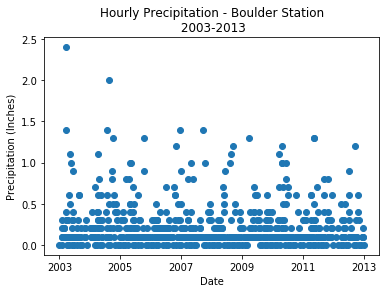

In [45]:
fig, ax = plt.subplots()
ax.plot('DATE', 'HPCP_round', 'o', data=precip_boulder_day.reset_index())
ax.set(xlabel='Date', ylabel='Precipitation (Inches)',
       title="Hourly Precipitation - Boulder Station\n 2003-2013");

In [1]:
# ```{r plot-daily, echo=F, warning=F, fig.cap="Daily precip plot"}

# precPlot_daily1 <- ggplot(data=precip.boulder,  # the data frame

#       aes(DATE, HPCP)) +   # the variables of interest

#       geom_bar(stat="identity") +   # create a bar graph

#       xlab("Date") + ylab("Precipitation (Inches)") +  # label the x & y axes

#       ggtitle("Daily Precipitation - Boulder Station\n 2003-2013")  # add a title



# precPlot_daily1



# ```




Next we `summarize()` the precipitation column (total_precip) - grouped by day.

What this means is that we ADD UP all of the values for each day to get a grand

total amount of precipitation each day.






In [54]:
# Not sure how the stuff below is different from the stuff above, should double check!
daily_sum_precip = precip_boulder.resample('D', on='DATE').sum()
daily_sum_precip.head()

,HPCP,HPCP_round
DATE,,
1948-08-01,0.00,0.0
1948-08-02,0.05,0.0
1948-08-03,0.07,0.0
1948-08-04,0.14,0.0
1948-08-05,0.02,0.0


In [1]:
# ``` {r daily-summ}

# # use dplyr

# daily_sum_precip <- precip.boulder %>%

#   mutate(day = as.Date(DATE, format="%Y-%m-%d")) %>%

#   group_by(day) %>% # group by the day column

#   summarise(total_precip=sum(HPCP)) # calculate the SUM of all precipitation that occured on each day



# # how large is the resulting data frame?

# nrow(daily_sum_precip)



# # view the results

# head(daily_sum_precip)



# # view column names

# names(daily_sum_precip)



# ```






Now plot the daily data.




In [1]:
# ``` {r daily-prec-plot, echo=F, warning=F, fig.cap="Daily precipitation for boulder"}

# # plot daily data

# precPlot_daily <- ggplot(daily_sum_precip, aes(day, total_precip)) +

#       geom_bar(stat="identity") +

#       xlab("Date") + ylab("Precipitation (inches)") +

#       ggtitle("Daily Precipitation - Boulder Station\n 2003-2013")



# precPlot_daily

# ```






Finally, plot a temporal subsets of the data from 2000-2013. We learned how to

do this in the previous lessons.





Now we can easily see the dramatic rainfall event in mid-September!



<i class="fa fa-star"></i> **R Tip:** If you are using a date-time class, instead

of just a date class, you need to use `scale_x_datetime()`.

{: .notice}



#### Subset The Data



If we wanted to, we could subset this data set using the same code that we used

previously to subset! An example of the subsetted plot is below.




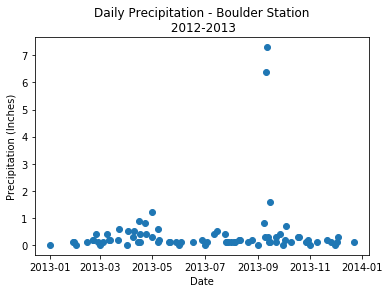

In [58]:
this_daily_sum = daily_sum_precip.query('DATE >= "2012-12-31" and DATE <= "2013-12-31"')

fig, ax = plt.subplots()
ax.plot('DATE', 'HPCP_round', 'o', data=this_daily_sum.reset_index())
ax.set(xlabel='Date', ylabel='Precipitation (Inches)',
       title="Daily Precipitation - Boulder Station\n 2012-2013");

In [1]:
# ``` {r subset-data, echo=F, warning='hide', fig.cap="final precip plot daily sum"}



# # use dplyr

# daily_sum_precip_subset <- daily_sum_precip %>%

#   filter(day >= as.Date('2012-12-31') & day <= as.Date('2013-12-31'))





# # create new plot

# precPlot_30yrs <- ggplot(daily_sum_precip_subset, aes(day, total_precip)) +

#   geom_bar(stat="identity") +

#   xlab("Date") + ylab("Precipitation (inches)") +

#   ggtitle("Daily Total Precipitation 2012 - 2013 for Boulder Creek")



# precPlot_30yrs



# ```
